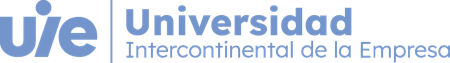

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# PLD3. Regresión Lineal Univariante por Derivadas

Objetivos:

1. Implementar un modelo de regresión lineal univariante mediante el método de las derivadas, a partir de las ecuaciones obtenidas en la demostración.
2. Probar el modelo con un conjunto de datos de ejemplo.
3. Comparar los resultados con el regresor lineal de Scikit-Learn, a saber
`skearn.linear model.LinearRegression`.


In [1]:
import matplotlib.pyplot as plt  # autoflake: ignore
import numpy as np  # autoflake: ignore
from sklearn.linear_model import LinearRegression  # autoflake: ignore

In [2]:
NUMERO_PUNTOS_VECTORES_ALEATORIOS = 100

## Se crean un par de vectores con números aleatorios para las primeras pruebas

Antes de utilizar datos reales, simplemente creamos estos datos _mock_ para probar el código.

In [3]:
x = np.random.rand(NUMERO_PUNTOS_VECTORES_ALEATORIOS) * 10 
y = np.random.rand(NUMERO_PUNTOS_VECTORES_ALEATORIOS) * 10 

x.sort()
y.sort()

In [4]:
print(x)


[0.09277156 0.10318954 0.1489628  0.34952516 0.41828946 0.47973354
 0.50669797 0.58786825 0.7031424  0.9258334  0.96327719 1.00650049
 1.08933804 1.10408217 2.11751623 2.12960237 2.40004693 2.43418356
 2.52274263 2.55170173 2.59442951 2.64545577 2.81032832 2.95607971
 3.00298475 3.01310907 3.1297823  3.15418242 3.28840219 3.40065531
 3.49652527 3.55867701 3.57160341 3.68243361 3.74373861 3.96749863
 3.97343784 4.02884393 4.05484651 4.08810075 4.65378679 4.76994205
 4.80889353 4.82515501 5.29260569 5.43086149 5.47323576 5.56448963
 5.67862756 5.76756139 5.96346257 6.05690526 6.12029948 6.14963503
 6.23869367 6.31062806 6.5224676  6.64215932 6.92002792 6.982448
 7.03646228 7.03899158 7.04721326 7.22809149 7.31697078 7.37608711
 7.69276174 7.73333682 7.86431755 7.98953307 8.03005566 8.13013914
 8.15333942 8.38061838 8.39347599 8.41047748 8.46559053 8.50101713
 8.53263841 8.61551756 8.62361923 8.70315154 8.72123628 8.75805423
 8.79006043 8.97707775 9.03803386 9.17815511 9.18782065 9.196386

## Implementación de las ecuaciones 28 y 29 de la transparencia 48 \[`Transparencias U2-S04.pdf`\]

In [5]:
def calcular_beta_1(x: np.array, y: np.array) -> float:
    """
    Se calcula `beta_1`, que sería la pendiente de la ecuación de la recta de regresión lineal.
    """
    numerador = np.sum(((x * y) - (y.mean() * x)))
    denominador = np.sum(((x ** 2) - (x.mean() * x)))
    return numerador / denominador

In [6]:
# Pruebas
print(calcular_beta_1(x, y))

0.9587102779761535


In [7]:
def calcular_beta_0(x: np.array, y: np.array, beta_1: float) -> float:
    """
    Se calcula `beta_0`, que sería en el ordenada al origen de la ecuación de la recta de regresión lineal.
    """
    return y.mean() - beta_1 * x.mean()

In [8]:
# Pruebas
print(calcular_beta_0(x, y, 1.5))
print(calcular_beta_0(x, y, calcular_beta_1(x, y)))

-3.670740932616691
-0.6925711488931441


### 

### Comprobamos el funcionamiento de las ecuaciones del regresor gráficamente

[-0.6036301  -0.59364227 -0.54975898 -0.35747779 -0.29155275 -0.23264568
 -0.20679459 -0.12897581 -0.0184613   0.19503485  0.23093259  0.27237121
  0.35178842  0.36592377  1.33751342  1.34910053  1.60837851  1.64110564
  1.72600814  1.75377153  1.79473508  1.84365448  2.00171949  2.14145285
  2.1864212   2.19612748  2.30798331  2.33137596  2.46005383  2.56767204
  2.65958357  2.71916908  2.73156175  2.8378158   2.89658954  3.11111056
  3.11680455  3.16992293  3.19485188  3.22673305  3.76906208  3.88042132
  3.91776451  3.93335455  4.38150433  4.51405158  4.55467623  4.64216225
  4.75158746  4.83684923  5.0246617   5.11424618  5.17502287  5.20314716
  5.28852859  5.35749283  5.56058558  5.67533526  5.94173074  6.00157351
  6.05335756  6.05578242  6.06366463  6.23707445  6.32228394  6.37895938
  6.6825586   6.72145835  6.84703091  6.96707633  7.00592574  7.10187681
  7.12411915  7.34201382  7.35434055  7.37064005  7.4234775   7.45744134
  7.48775699  7.56721408  7.57498124  7.65122969  7

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8316\1471466662.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


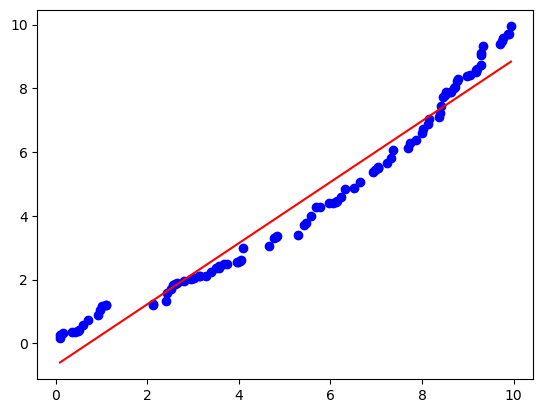

In [9]:
beta_1=calcular_beta_1(x, y)
beta_0=calcular_beta_0(x, y, beta_1)
y_hat= beta_0 + beta_1 * x
print(y_hat)

# Ahora comprobamos el funcionamiento graficamente
import matplotlib.pyplot as plt

fig=plt.figure()
plt.scatter(x, y, color="blue")
plt.plot(x, y_hat, color="red")

fig.show()

## Se prueba el regresor de Scikit-Learn

In [10]:
# Probamos el regresor de Sklearn
modelo = LinearRegression() 
modelo.fit(x.reshape(-1, 1), y)
y_pred = modelo.predict(x.reshape(-1, 1))
print(y_pred)

[-0.6036301  -0.59364227 -0.54975898 -0.35747779 -0.29155275 -0.23264568
 -0.20679459 -0.12897581 -0.0184613   0.19503485  0.23093259  0.27237121
  0.35178842  0.36592377  1.33751342  1.34910053  1.60837851  1.64110564
  1.72600814  1.75377153  1.79473508  1.84365448  2.00171949  2.14145285
  2.1864212   2.19612748  2.30798331  2.33137596  2.46005383  2.56767204
  2.65958357  2.71916908  2.73156175  2.8378158   2.89658954  3.11111056
  3.11680455  3.16992293  3.19485188  3.22673305  3.76906208  3.88042132
  3.91776451  3.93335455  4.38150433  4.51405158  4.55467623  4.64216225
  4.75158746  4.83684923  5.0246617   5.11424618  5.17502287  5.20314716
  5.28852859  5.35749283  5.56058558  5.67533526  5.94173074  6.00157351
  6.05335756  6.05578242  6.06366463  6.23707445  6.32228394  6.37895938
  6.6825586   6.72145835  6.84703091  6.96707633  7.00592574  7.10187681
  7.12411915  7.34201382  7.35434055  7.37064005  7.4234775   7.45744134
  7.48775699  7.56721408  7.57498124  7.65122969  7

### Comprobamos el funcionamiento del regresor de Scikit-Learn gráficamente

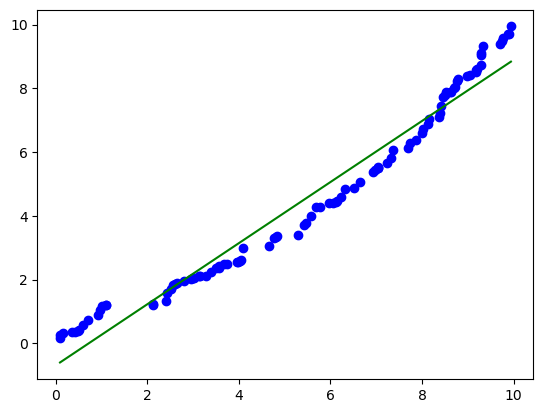

In [11]:
# Comprobamos con sklearn grafícamente
fig=plt.figure()
plt.scatter(x, y, color="blue")
plt.plot(x, y_pred, color="green")

## Comparación de ambos regresores

Se comparan resultados de la versión con las fórmulas de las derivadas y la versión de Scikit-Learn.

### Gráficamente

Superponiendo ambas rectas en un mismo gráfico.

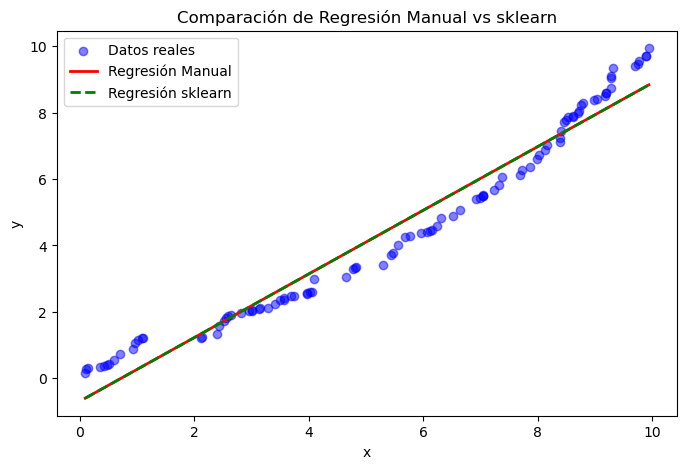

In [12]:
# Superponemos ambas rectas en un mismo gráfico
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", alpha=0.5, label="Datos reales")
plt.plot(x, y_hat, color="red", linewidth=2, label="Regresión Manual")
plt.plot(x, y_pred, color="green", linestyle="--", linewidth=2, label="Regresión sklearn")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de Regresión Manual vs sklearn")
plt.show()


### Numéricamente

In [13]:
# Coeficientes manuales
print("Manual:")
print("  Intercepto =", round(beta_0, 4))
print("  Pendiente  =", round(beta_1, 4))

# Coeficientes sklearn
print("\nsklearn:")
print("  Intercepto =", round(modelo.intercept_, 4))
print("  Pendiente  =", round(modelo.coef_[0], 4))

# Error entre ambas predicciones
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_hat, y_pred)
print("\nDiferencia (MSE) =", round(mse, 8))


Manual:
  Intercepto = -0.6926
  Pendiente  = 0.9587

sklearn:
  Intercepto = -0.6926
  Pendiente  = 0.9587

Diferencia (MSE) = 0.0


## Se arquetipa modelo propio a partir de las ecuaciones de las derivadas

- Usamos métodos privados para ocultar la implementación de las derivadas, porque no interesa exponerla públicamente.
- Sólo se exponen los métodos que interesa que el consumidor del modelo utilice: `fit` y `predict`.
- El usuario de este tipo de clases estará habitado a este uso.


In [14]:
class RegresorLinealDerivadas:
    def __init__(self) -> None:
        self.beta_0 = 0.0
        self.beta_1 = 0.0
    
    def fit(self, x: np.array, y: np.array):
        self.beta_1 = calcular_beta_1(x, y)
        self.beta_0 = calcular_beta_0(x, y, self.beta_1)

    def predict(self, x: np.array) -> np.array:
        return self.beta_0 + self.beta_1 * x

In [15]:
# Creamos instancia de modelo propio y entrenamos
modelo_derivadas = RegresorLinealDerivadas()
modelo_derivadas.fit(x, y)

In [16]:
# Observamos parámetros tras ejecutar entrenamiento
print("Parámetros del modelo propio:")
print("  Intercepto =", round(modelo_derivadas.beta_0, 4))
print("  Pendiente  =", round(modelo_derivadas.beta_1, 4))


Parámetros del modelo propio:
  Intercepto = -0.6926
  Pendiente  = 0.9587


In [17]:
# Calculamos inferencia
y_hat_derivadas = modelo_derivadas.predict(x)
print(y_hat_derivadas)

[-0.6036301  -0.59364227 -0.54975898 -0.35747779 -0.29155275 -0.23264568
 -0.20679459 -0.12897581 -0.0184613   0.19503485  0.23093259  0.27237121
  0.35178842  0.36592377  1.33751342  1.34910053  1.60837851  1.64110564
  1.72600814  1.75377153  1.79473508  1.84365448  2.00171949  2.14145285
  2.1864212   2.19612748  2.30798331  2.33137596  2.46005383  2.56767204
  2.65958357  2.71916908  2.73156175  2.8378158   2.89658954  3.11111056
  3.11680455  3.16992293  3.19485188  3.22673305  3.76906208  3.88042132
  3.91776451  3.93335455  4.38150433  4.51405158  4.55467623  4.64216225
  4.75158746  4.83684923  5.0246617   5.11424618  5.17502287  5.20314716
  5.28852859  5.35749283  5.56058558  5.67533526  5.94173074  6.00157351
  6.05335756  6.05578242  6.06366463  6.23707445  6.32228394  6.37895938
  6.6825586   6.72145835  6.84703091  6.96707633  7.00592574  7.10187681
  7.12411915  7.34201382  7.35434055  7.37064005  7.4234775   7.45744134
  7.48775699  7.56721408  7.57498124  7.65122969  7

### Comprobamos el funcionamiento del regresor propio gráficamente

Comparación de todas las rectas obtenidas. Recomprobación.

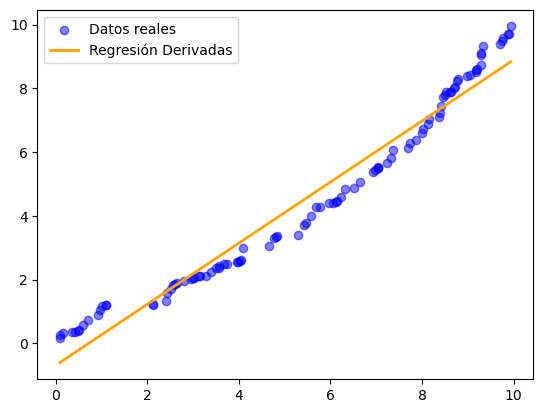

In [18]:
# Comprobamos el regrsor propio gráficamente
fig=plt.figure()
plt.scatter(x, y, color="blue", alpha=0.5, label="Datos reales")
plt.plot(x, y_hat_derivadas, color="orange", linewidth=2, label="Regresión Derivadas")
plt.legend()

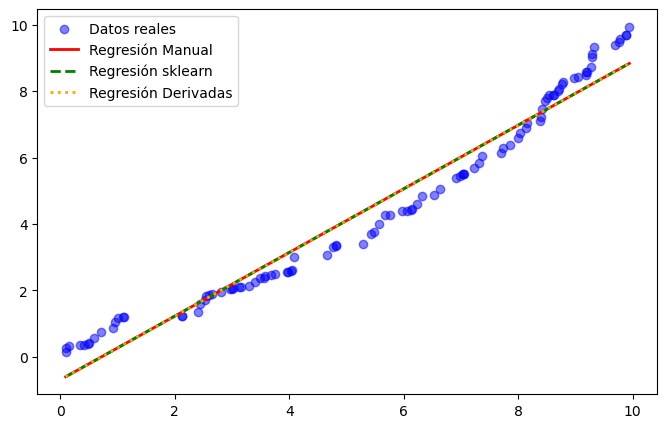

In [19]:
# Comparamos todas las rectas
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", alpha=0.5, label="Datos reales")
plt.plot(x, y_hat, color="red", linewidth=2, label="Regresión Manual")
plt.plot(x, y_pred, color="green", linestyle="--", linewidth=2, label="Regresión sklearn")
plt.plot(x, y_hat_derivadas, color="orange", linestyle=":", linewidth=2, label="Regresión Derivadas")
plt.legend()